# **Netflix TV Shows and Movies analysis**

---

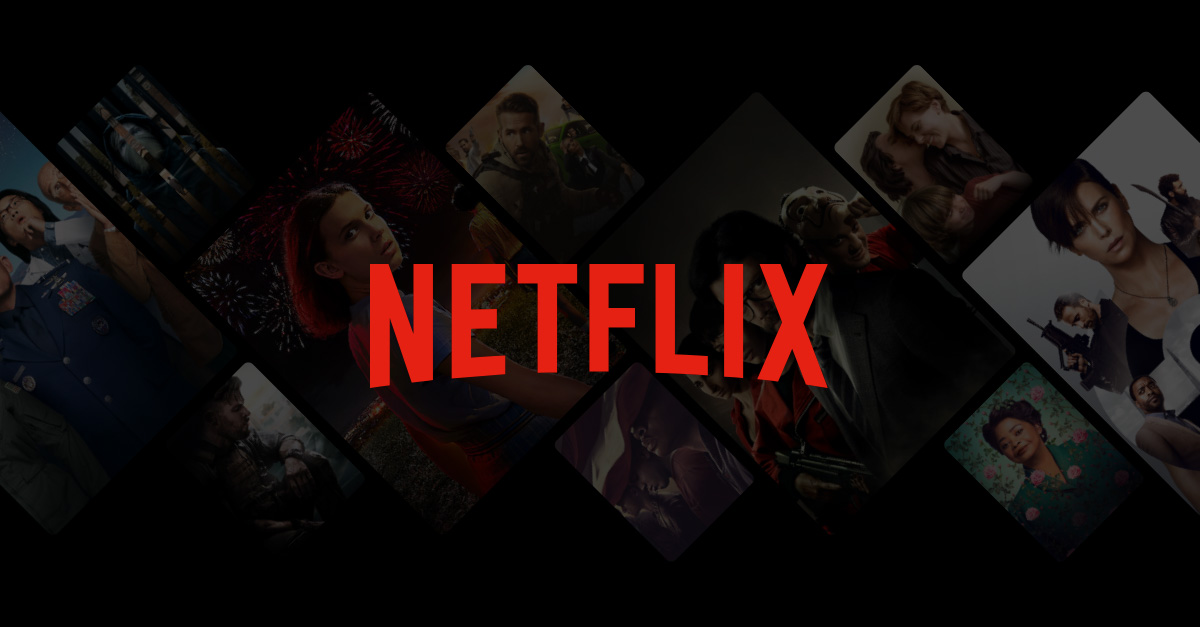

## **Content**:
* [1. Import modules](#import_modules)
* [2. Read data](#read_data)
* [3. Data exploration](#data_exploration)
* [4. Data cleaning](#data_cleaning)
    * [4.1. NA Values](#na_values)
* [5. Data manipulation](#data_manipulation)
    * [5.1. Split data](#split_data)
    * [5.2. Values dataframes](#values_dataframes)
* [6. Data visualization](#data_visualization)
    * [6.1. TV Shows](#tv_shows)
    * [6.1. Movies](#movies)

## **1. Import modules**
<a id="import_modules"></a>

* **Data manipulation**
    * *pandas*
    * *numpy*
* **Operative System**
    * *os*
* **Data visualization**
    * *matplotlib.pyplot*
    * *seaborn*
* **Interactive data visualization**
    * *plotly.express*
    * *plotly.graph_objects*

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, plot, init_notebook_mode, iplot

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## **2. Read data**
<a id="read_data"></a>

In [ ]:
netflix = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
netflix.head()

In [ ]:
print("Netflix dataframe has " + str(netflix.shape[0]) + " rows and " + str(netflix.shape[1]) + " columns.")

## **3. Data exploration**
<a id = "data_exploration"></a>

In [ ]:
netflix.info()

With this info, we can see some columns with NA values, because this dataframe has *7787* rows and in some columns we don't have that value of rows.

In [ ]:
netflix.isna().sum()

We can confirm that we have some NA values like we said before.
<br>
When we have NA values, we can do **3 things**:
* Delete all NA values.
* Change those NA values to the mode, mean... of other values.
* Fill those NA values with another values: NA = 0 or NA = No Data.

## **4. Data Cleaning**
<a id="data_cleaning"></a>

### **4.1. NA values**
<a id = "na_values"></a>

We can use the mode in the variables *director* and *country*, and with the other variables we will fill it with "No Data".

In [ ]:
netflix["director"].fillna(netflix["director"].mode()[0], inplace=True)
netflix["country"].fillna(netflix["country"].mode()[0], inplace=True)

netflix.fillna("No Data", inplace=True)

In [ ]:
netflix.isna().sum()

We have already fixed NA values problem!
<br>
In this cases, you have to decide what do you have to do.

## **5. Data manipulation**

### **5.1. Split data**
<a id = "split_data"></a>

After data exploration, we are going to split netflix data in **2 parts**:
* *TV Shows*
* *Movie*

In [ ]:
tv_shows = netflix.loc[netflix["type"] == "TV Show"]
movies = netflix.loc[netflix["type"] == "Movie"]

### 5.2. **Values dataframes**
<a id = "values_dataframes"></a>

We can create *dataframes* with total values amount of each value.

In [ ]:
countries = netflix["country"].value_counts().to_frame()
ratings = netflix["rating"].value_counts().to_frame()
duration = movies["duration"].value_counts().to_frame()
duration.head()

## **6. Data visualization**
<a id="data_visualization"></a>

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = sns.countplot(x="type", data=netflix, palette="muted")
y_max = netflix["type"].value_counts().max()
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Comparing total TV Shows and Movies of Netflix")
for p in ax.patches:
             ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=12, color="black")
plt.show()

In [ ]:
labels = ["TV Shows", "Movies"]
values = [tv_shows.type.count(), movies.type.count()]
colors = ['#1f77b4', '#2ca02c']

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='label', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title={"text": "TV Shows and Movies in Netflix"})
fig.show()

We have much more *Movies* in Netflix than *TV Shows*.

In [ ]:
fig = plt.figure(figsize=(15, 10))
sns.countplot(x="rating", data=netflix, order=ratings.index, hue="type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Comparing TV Shows and Movies ratings")
plt.legend(title="Type", loc='upper right')
plt.show()

### **6.1. TV Shows**
<a id="tv_shows"></a>

In [ ]:
fig = plt.figure(figsize=(15, 10))
sns.countplot(x="duration", data=tv_shows, order=tv_shows["duration"].value_counts().index)
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.title("TV Shows seasons amount values")
plt.show()

Most of the **Netflix** *TV Shows* only have *1 Season*!
<br>
After that, we have *2 Seasons* and *3 Seasons*.

In [ ]:
fig = px.pie(tv_shows, values=tv_shows["country"].value_counts()[:10], names=tv_shows["country"].value_counts()[:10].index,
             title="Top 10 countries with most TV Shows release")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

*United States* it's the Top 1 with almost **1000** *TV Shows* release, with **53,8%** of the values among the *Top 10*.
<br>
After *United States*, we have *United Kingdom* with only **204** *TV Shows* release and **11,2%** of the values.

In [ ]:
fig = plt.figure(figsize=(15, 10))
sns.countplot(x="release_year", data=tv_shows, order=tv_shows["release_year"].value_counts()[:20].index)
plt.xlabel("Release year")
plt.ylabel("Count")
plt.title("Years with most TV Shows release")
plt.xticks(rotation=45)
plt.show()

The year with most *TV Shows* release was *2020* followed by *2019*, *2018*.

### **6.2. Movies**
<a id="movies"></a>

In [ ]:
fig = px.pie(movies, values=movies["country"].value_counts()[:10], names=movies["country"].value_counts()[:10].index,
             title="Top 10 countries with most Movies release")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

We can see again, *United States* holds first position with **2080** *Movies* release, and **56,2%** of the values among the *Top 10* countries.
<br>
But in this case, with the *Movies*, the second place has *India*, with **852** *Movies* release and **23%** of the values.

In [ ]:
fig = plt.figure(figsize=(15, 10))
sns.countplot(x="release_year", data=movies, order=movies["release_year"].value_counts()[:20].index)
plt.xlabel("Release year")
plt.ylabel("Count")
plt.title("Years with most Movies release")
plt.xticks(rotation=65)
plt.show()

Years with most *Movies* release were *2017* and *2018*, followed by *2016* and *2019*.

In [ ]:
fig = plt.figure(figsize=(15, 10))
sns.countplot(x="duration", data=netflix, order=duration.index[:20])
plt.xlabel("Duration")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Netflix Movies duration")
plt.show()

Most of the *Netflix* *Movies* duration it's standar duration between *90 mins* and *100 mins*.